# 💼 Data Analyst Jobs — Market Analysis

| Field | Details |
|-------|--------|
| **Project Title** | Data Analyst Jobs Market Analysis |
| **Tools** | Python, Pandas, NumPy, Matplotlib, Seaborn, NLP, SQL |
| **Domain** | Machine Learning · Financial Analysis · Data Analytics |
| **Difficulty** | Intermediate |

---
## 📌 Objective
Analyze data analyst job postings to identify salary trends, most in-demand skills, top hiring cities, experience requirements, and company-size patterns — helping aspiring data analysts make informed career decisions.

---

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

print('✅ All libraries imported!')

✅ All libraries imported!


## Step 2: Load & Explore Dataset

In [2]:
# Load dataset
# Download from: https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs
df = pd.read_csv('DataAnalyst.csv')

print(f'Shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
df.head()

Shape: (2253, 16)
Columns: ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


## Step 3: Data Cleaning

### 3.1 Handle Missing Values & Duplicates

In [5]:
# Missing values
print('Missing values:')
print(df.isnull().sum())

# Remove duplicates
before = len(df)
df.drop_duplicates(inplace=True)
print(f'\nDuplicates removed: {before - len(df)}')
print(f'Records remaining: {len(df)}')

Missing values:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

Duplicates removed: 0
Records remaining: 2253


In [6]:
# Clean -1 values (used as placeholder for missing)
df = df[df['Rating'] != -1]
print(f'After removing -1 ratings: {len(df)} records')

After removing -1 ratings: 1981 records


### 3.2 Parse Salary Estimates

In [7]:
# Parse salary range from 'Salary Estimate' column
# Example: '$65K-$95K (Glassdoor est.)'
def parse_salary(salary_str):
    if pd.isna(salary_str) or salary_str == '-1':
        return np.nan, np.nan
    nums = re.findall(r'\$(\d+)K', str(salary_str))
    if len(nums) >= 2:
        return float(nums[0]), float(nums[1])
    return np.nan, np.nan

df[['Min_Salary', 'Max_Salary']] = df['Salary Estimate'].apply(
    lambda x: pd.Series(parse_salary(x))
)
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

print('Salary parsing complete!')
print(f'Average salary range: ${df["Min_Salary"].mean():.1f}K — ${df["Max_Salary"].mean():.1f}K')
df[['Salary Estimate', 'Min_Salary', 'Max_Salary', 'Avg_Salary']].dropna().head()

Salary parsing complete!
Average salary range: $54.1K — $89.9K


,Salary Estimate,Min_Salary,Max_Salary,Avg_Salary
0,$37K-$66K (Glassdoor est.),37.0,66.0,51.5
1,$37K-$66K (Glassdoor est.),37.0,66.0,51.5
2,$37K-$66K (Glassdoor est.),37.0,66.0,51.5
3,$37K-$66K (Glassdoor est.),37.0,66.0,51.5
4,$37K-$66K (Glassdoor est.),37.0,66.0,51.5


### 3.3 Extract Skills from Job Descriptions

In [8]:
# Extract key skills mentioned in job descriptions
skills = {
    'Python':          r'\bpython\b',
    'SQL':             r'\bsql\b',
    'Excel':           r'\bexcel\b',
    'Tableau':         r'\btableau\b',
    'Power BI':        r'\bpower\s?bi\b',
    'R':               r'\b[Rr]\b(?! )',
    'Machine Learning':r'machine\s?learning',
    'Statistics':      r'statistic',
    'Communication':   r'communicat',
    'SAS':             r'\bsas\b',
    'Spark':           r'\bspark\b',
    'Hadoop':          r'\bhadoop\b',
    'AWS':             r'\baws\b',
    'Azure':           r'\bazure\b',
    'TensorFlow':      r'\btensorflow\b',
}

if 'Job Description' in df.columns:
    for skill, pattern in skills.items():
        df[skill] = df['Job Description'].str.lower().str.contains(
            pattern, regex=True, na=False
        ).astype(int)

    skill_counts = df[list(skills.keys())].sum().sort_values(ascending=False)
    skill_pct    = (skill_counts / len(df) * 100).round(1)
    print('Skill mentions (% of job postings):')
    print(skill_pct)
else:
    print('Job Description column not found — skipping skill extraction')

Skill mentions (% of job postings):
Communication       65.8
SQL                 61.3
Excel               40.2
Statistics          37.7
Python              28.9
Tableau             27.8
SAS                 15.5
R                   14.2
Power BI            10.9
Machine Learning     8.2
Hadoop               5.9
AWS                  5.8
Spark                3.2
Azure                2.8
TensorFlow           0.2
dtype: float64


### 3.4 Clean Location & Company Size

In [9]:
# Extract state from Location
if 'Location' in df.columns:
    df['State'] = df['Location'].apply(
        lambda x: x.split(',')[-1].strip() if pd.notna(x) else np.nan
    )
    df['City'] = df['Location'].apply(
        lambda x: x.split(',')[0].strip() if pd.notna(x) else np.nan
    )

# Clean Size column
if 'Size' in df.columns:
    df['Size'] = df['Size'].replace('-1', np.nan)

print('Location & size cleaned!')
print(df[['Location', 'City', 'State']].dropna().head())

Location & size cleaned!
       Location      City State
0  New York, NY  New York    NY
1  New York, NY  New York    NY
2  New York, NY  New York    NY
3  New York, NY  New York    NY
4  New York, NY  New York    NY


## Step 4: Exploratory Data Analysis

### 4.1 Top Job Titles

Job Title
Data Analyst               349
Senior Data Analyst         79
Junior Data Analyst         30
Business Data Analyst       26
Sr. Data Analyst            18
Data Analyst Junior         17
Data Analyst II             16
Data Quality Analyst        16
Lead Data Analyst           14
Data Governance Analyst     13
Data Reporting Analyst      12
Data Analyst III            11
Data Analyst I              10
Sr Data Analyst              9
Financial Data Analyst       9
Name: count, dtype: int64


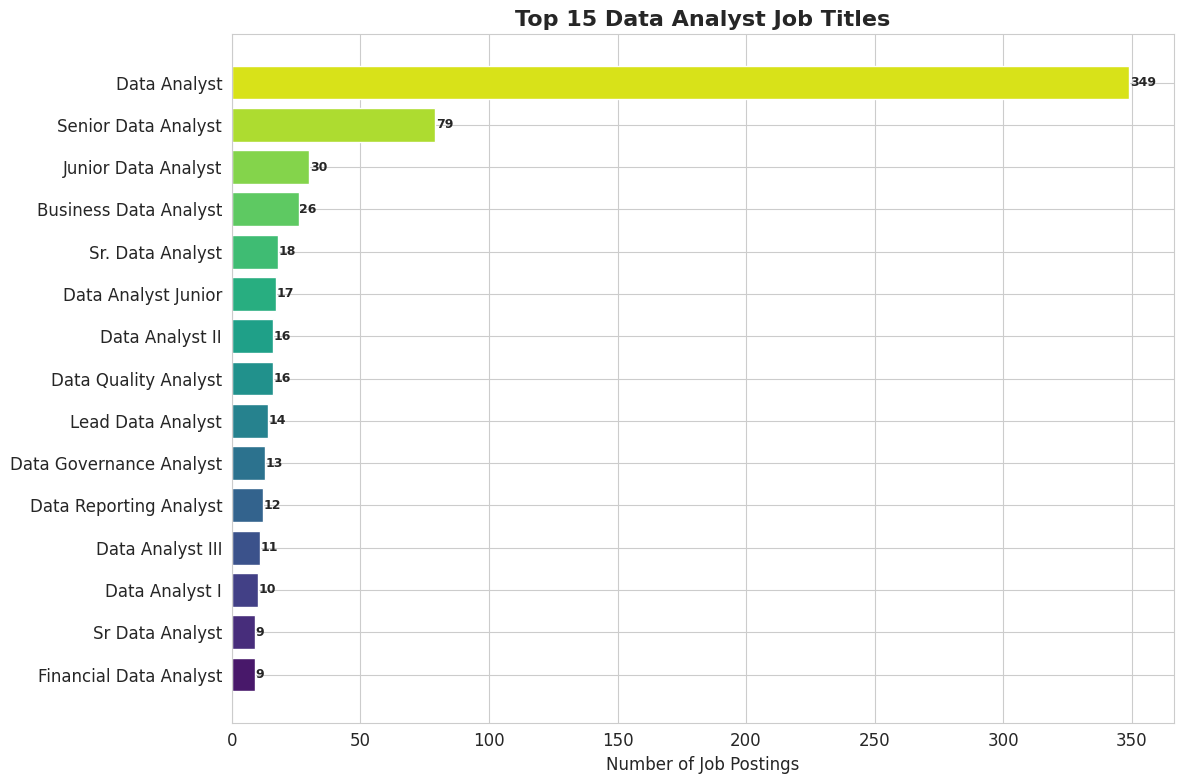

In [10]:
if 'Job Title' in df.columns:
    top_titles = df['Job Title'].value_counts().head(15)
    print(top_titles)

    plt.figure(figsize=(12, 8))
    bars = plt.barh(top_titles.index[::-1], top_titles.values[::-1],
                    color=sns.color_palette('viridis', 15))
    plt.xlabel('Number of Job Postings', fontsize=12)
    plt.title('Top 15 Data Analyst Job Titles', fontsize=16, fontweight='bold')
    for bar, val in zip(bars, top_titles.values[::-1]):
        plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                 str(val), va='center', fontweight='bold', fontsize=9)
    plt.tight_layout()
    plt.savefig('jobs_top_titles.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.2 Salary Distribution

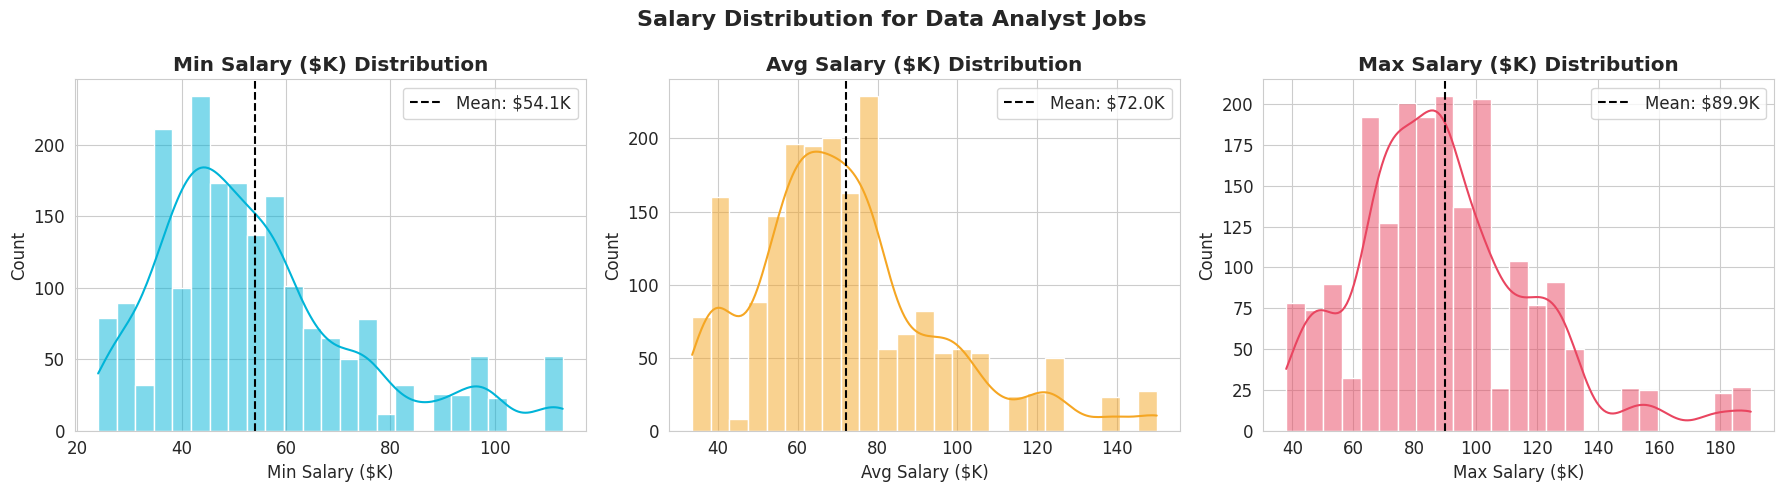

Average Minimum Salary: $54.1K
Average Salary:         $72.0K
Average Maximum Salary: $89.9K


In [11]:
salary_data = df[['Min_Salary', 'Max_Salary', 'Avg_Salary']].dropna()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, color, label in zip(
    axes,
    ['Min_Salary', 'Avg_Salary', 'Max_Salary'],
    ['#00B4D8', '#F5A623', '#E94560'],
    ['Min Salary ($K)', 'Avg Salary ($K)', 'Max Salary ($K)']
):
    sns.histplot(salary_data[col], bins=25, kde=True, color=color, ax=ax)
    ax.axvline(salary_data[col].mean(), color='black', linestyle='--', linewidth=1.5,
               label=f'Mean: ${salary_data[col].mean():.1f}K')
    ax.set_xlabel(label)
    ax.set_title(f'{label} Distribution', fontweight='bold')
    ax.legend()

plt.suptitle('Salary Distribution for Data Analyst Jobs', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('jobs_salary_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'Average Minimum Salary: ${salary_data["Min_Salary"].mean():.1f}K')
print(f'Average Salary:         ${salary_data["Avg_Salary"].mean():.1f}K')
print(f'Average Maximum Salary: ${salary_data["Max_Salary"].mean():.1f}K')

### 4.3 Most In-Demand Skills

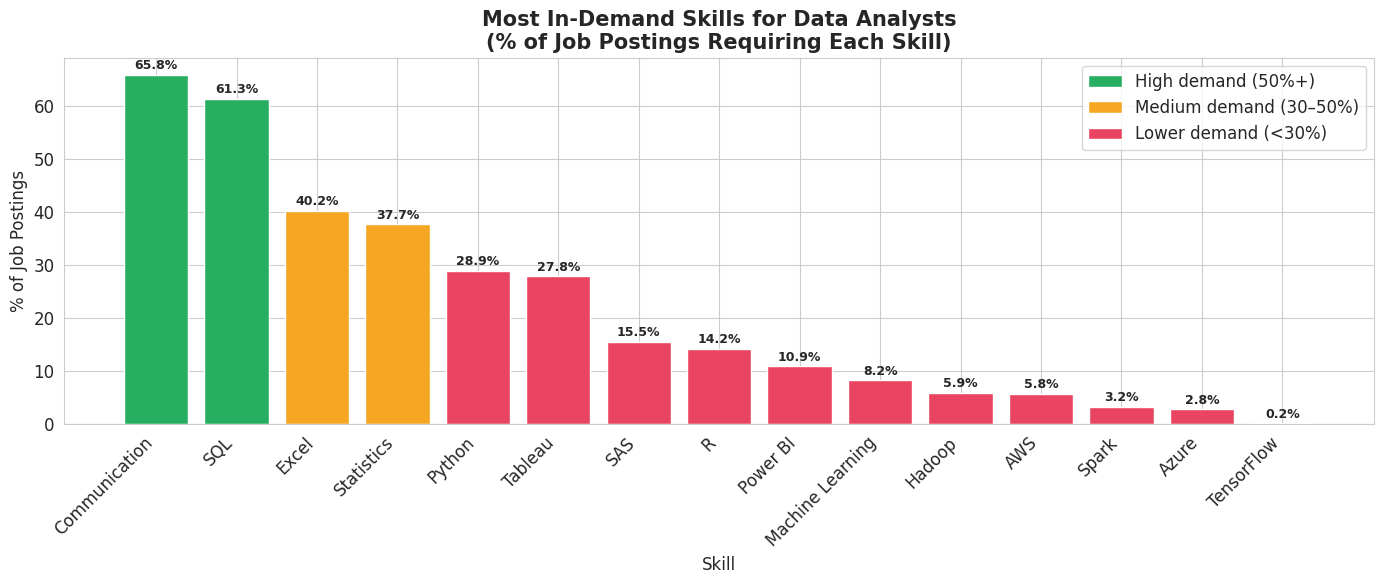

In [12]:
if list(skills.keys())[0] in df.columns:
    skill_pct = (df[list(skills.keys())].sum() / len(df) * 100).sort_values(ascending=False)

    plt.figure(figsize=(14, 6))
    colors = ['#27AE60' if v >= 50 else '#F5A623' if v >= 30 else '#E94560'
              for v in skill_pct.values]
    bars = plt.bar(skill_pct.index, skill_pct.values, color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Skill')
    plt.ylabel('% of Job Postings')
    plt.title('Most In-Demand Skills for Data Analysts\n(% of Job Postings Requiring Each Skill)',
              fontsize=15, fontweight='bold')
    for bar, val in zip(bars, skill_pct.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#27AE60', label='High demand (50%+)'),
        Patch(facecolor='#F5A623', label='Medium demand (30–50%)'),
        Patch(facecolor='#E94560', label='Lower demand (<30%)')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.tight_layout()
    plt.savefig('jobs_skills_demand.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.4 Top Hiring Locations

Location
New York, NY         272
Chicago, IL          109
San Francisco, CA    102
Austin, TX            74
Los Angeles, CA       67
Houston, TX           67
Charlotte, NC         67
San Diego, CA         60
Dallas, TX            58
Philadelphia, PA      50
Denver, CO            44
San Antonio, TX       40
Phoenix, AZ           32
San Jose, CA          32
Jersey City, NJ       30
Name: count, dtype: int64


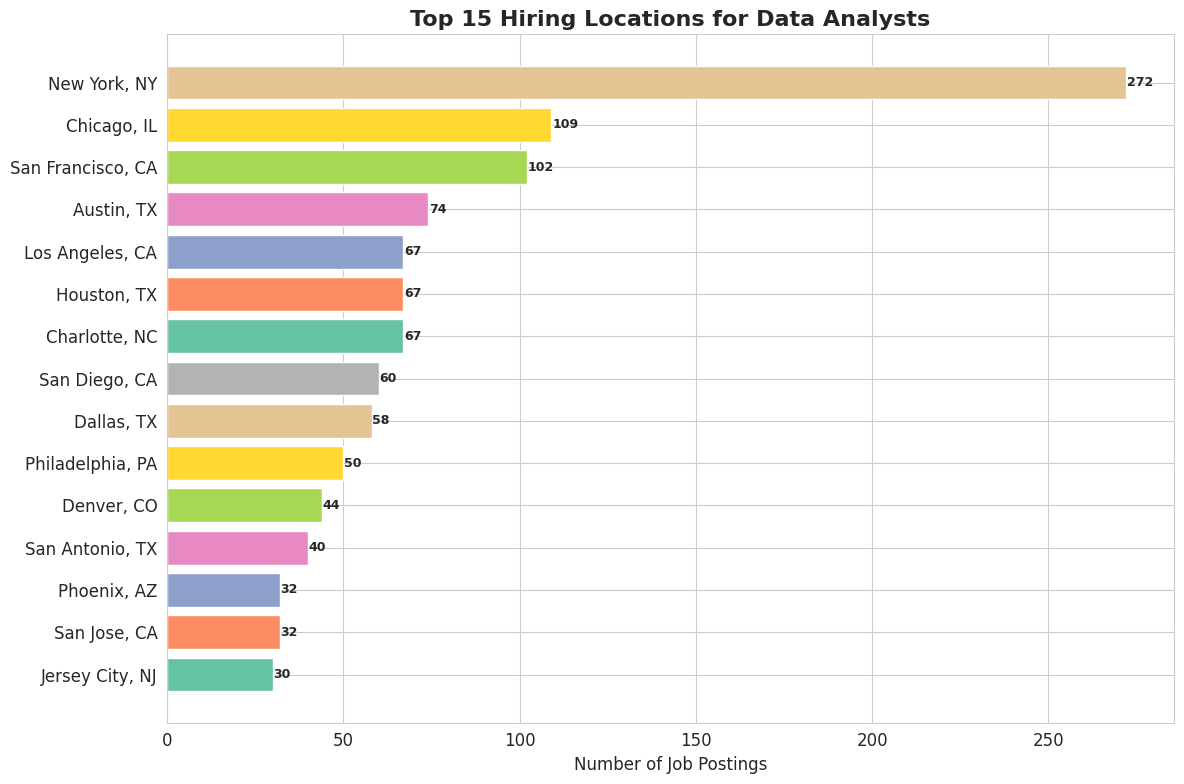

In [13]:
if 'Location' in df.columns:
    top_locations = df['Location'].value_counts().head(15)
    print(top_locations)

    plt.figure(figsize=(12, 8))
    bars = plt.barh(top_locations.index[::-1], top_locations.values[::-1],
                    color=sns.color_palette('Set2', 15))
    plt.xlabel('Number of Job Postings')
    plt.title('Top 15 Hiring Locations for Data Analysts', fontsize=16, fontweight='bold')
    for bar, val in zip(bars, top_locations.values[::-1]):
        plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                 str(val), va='center', fontweight='bold', fontsize=9)
    plt.tight_layout()
    plt.savefig('jobs_top_locations.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.5 Company Rating Distribution

Rating Stats: Mean=3.73, Median=3.70


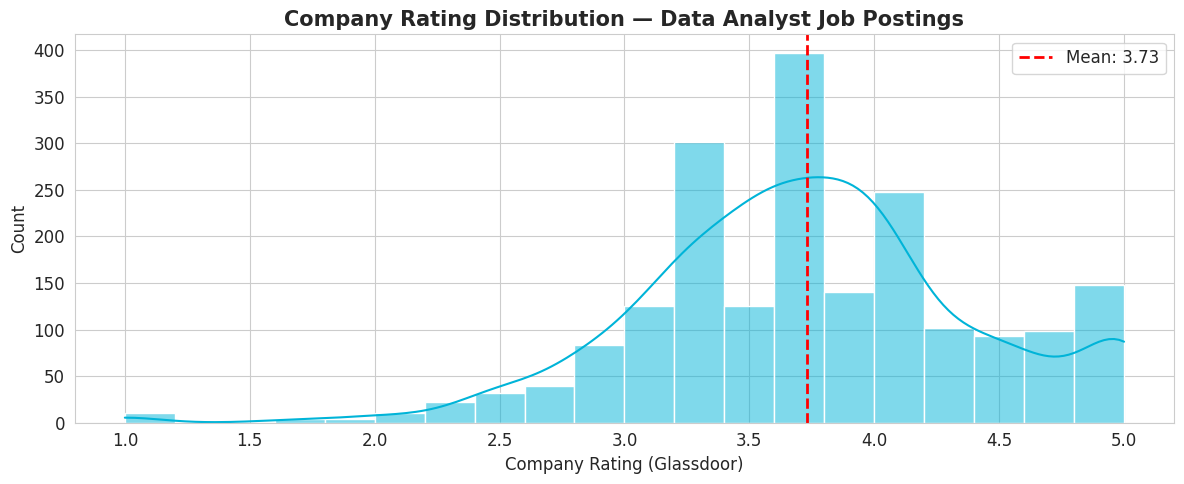

In [14]:
if 'Rating' in df.columns:
    ratings = df[df['Rating'] > 0]['Rating']
    print(f'Rating Stats: Mean={ratings.mean():.2f}, Median={ratings.median():.2f}')

    plt.figure(figsize=(12, 5))
    sns.histplot(ratings, bins=20, kde=True, color='#00B4D8')
    plt.axvline(ratings.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {ratings.mean():.2f}')
    plt.xlabel('Company Rating (Glassdoor)')
    plt.ylabel('Count')
    plt.title('Company Rating Distribution — Data Analyst Job Postings',
              fontsize=15, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('jobs_company_rating.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.6 Company Size Distribution

Size
51 to 200 employees        397
10000+ employees           375
1001 to 5000 employees     347
1 to 50 employees          288
201 to 500 employees       246
501 to 1000 employees      211
5001 to 10000 employees     97
Unknown                     20
Name: count, dtype: int64


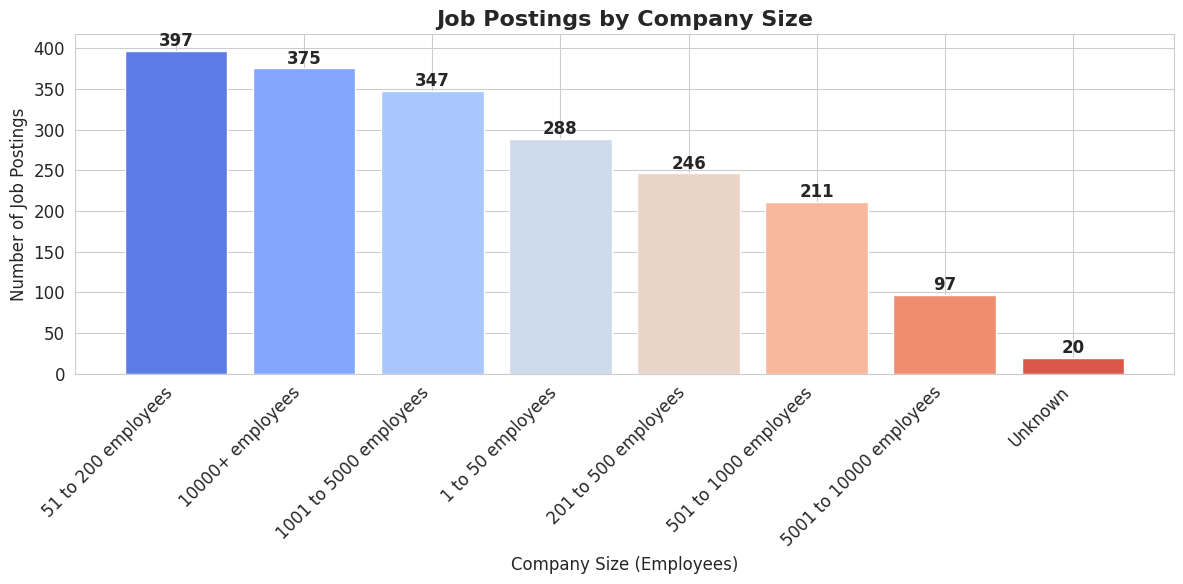

In [15]:
if 'Size' in df.columns:
    size_counts = df['Size'].value_counts().dropna()
    print(size_counts)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(size_counts.index, size_counts.values,
                   color=sns.color_palette('coolwarm', len(size_counts)))
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Company Size (Employees)')
    plt.ylabel('Number of Job Postings')
    plt.title('Job Postings by Company Size', fontsize=16, fontweight='bold')
    for bar, val in zip(bars, size_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 str(val), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.savefig('jobs_company_size.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.7 Salary by Sector

Sector
Real Estate                           85.2
Biotech & Pharmaceuticals             83.1
Arts, Entertainment & Recreation      80.6
Accounting & Legal                    75.2
Information Technology                74.3
Construction, Repair & Maintenance    73.6
Health Care                           72.8
-1                                    72.5
Manufacturing                         72.1
Business Services                     72.0
Consumer Services                     71.5
Telecommunications                    70.4
Name: Avg_Salary, dtype: float64


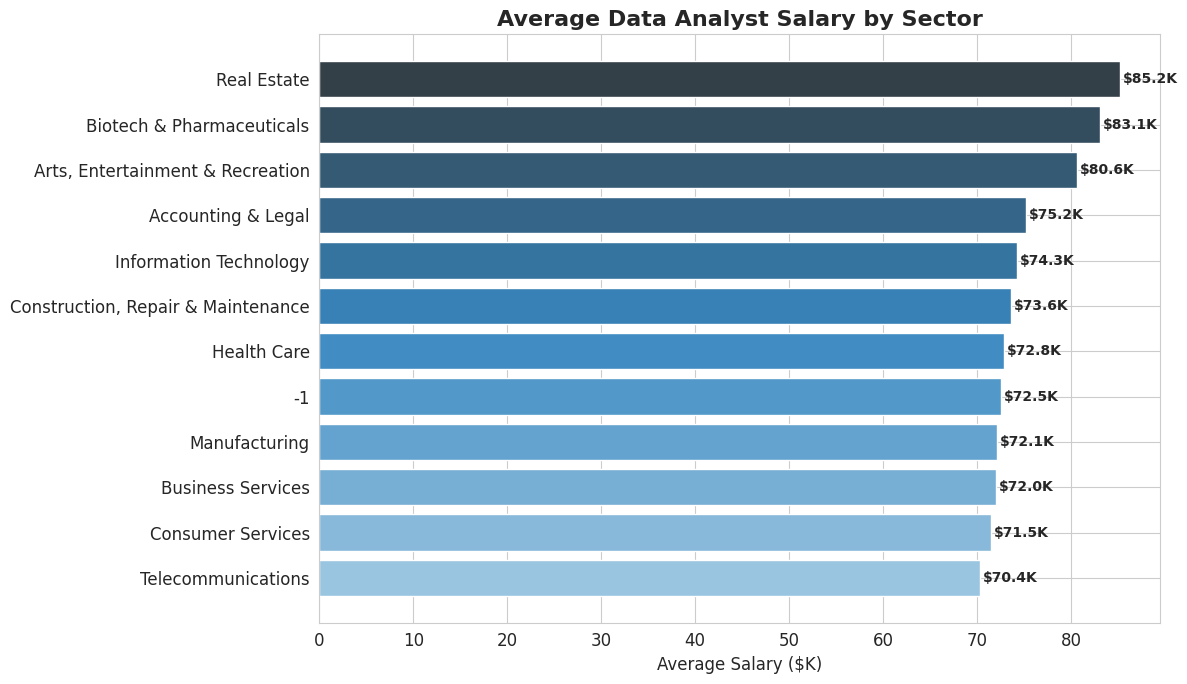

In [16]:
if 'Sector' in df.columns:
    salary_by_sector = (df.groupby('Sector')['Avg_Salary']
                        .mean()
                        .dropna()
                        .sort_values(ascending=False)
                        .head(12))
    print(salary_by_sector.round(1))

    plt.figure(figsize=(12, 7))
    bars = plt.barh(salary_by_sector.index[::-1], salary_by_sector.values[::-1],
                    color=sns.color_palette('Blues_d', len(salary_by_sector)))
    plt.xlabel('Average Salary ($K)')
    plt.title('Average Data Analyst Salary by Sector', fontsize=16, fontweight='bold')
    for bar, val in zip(bars, salary_by_sector.values[::-1]):
        plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
                 f'${val:.1f}K', va='center', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.savefig('jobs_salary_by_sector.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.8 Top Hiring Companies

Top hiring companies:
Company Name
Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
Avacend, Inc.\n2.5                       13
Mondo\n3.9                               11
Apple\n4.1                               10
Apex Systems\n3.8                        10
eTeam Inc.\n3.7                          10
Name: count, dtype: int64


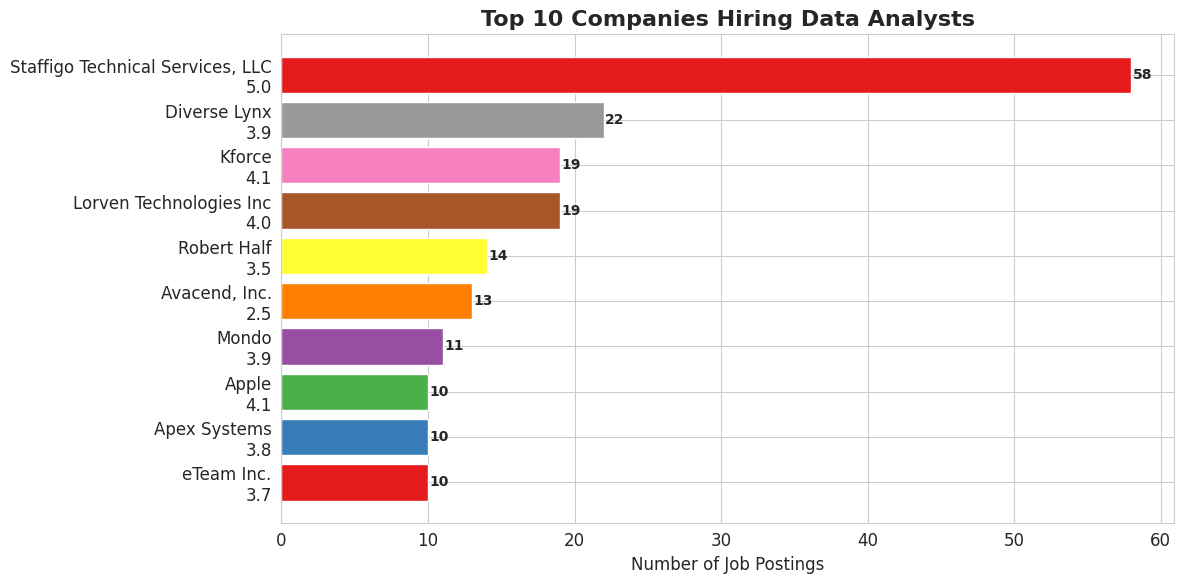

In [17]:
if 'Company Name' in df.columns:
    top_companies = df['Company Name'].value_counts().head(10)
    print('Top hiring companies:')
    print(top_companies)

    plt.figure(figsize=(12, 6))
    bars = plt.barh(top_companies.index[::-1], top_companies.values[::-1],
                    color=sns.color_palette('Set1', 10))
    plt.xlabel('Number of Job Postings')
    plt.title('Top 10 Companies Hiring Data Analysts', fontsize=16, fontweight='bold')
    for bar, val in zip(bars, top_companies.values[::-1]):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
                 str(val), va='center', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.savefig('jobs_top_companies.png', dpi=150, bbox_inches='tight')
    plt.show()

### 4.9 Skill vs Salary Correlation

           Skill  With Skill  Without Skill  Premium ($K)
           Spark        76.0           71.9           4.1
          Python        74.9           70.9           4.0
         Tableau        74.6           71.0           3.6
               R        74.5           71.6           2.9
Machine Learning        73.8           71.9           2.0
             AWS        71.7           72.0          -0.4
             SQL        71.6           72.7          -1.0
           Excel        71.6           72.3          -0.7
        Power BI        68.6           72.4          -3.9


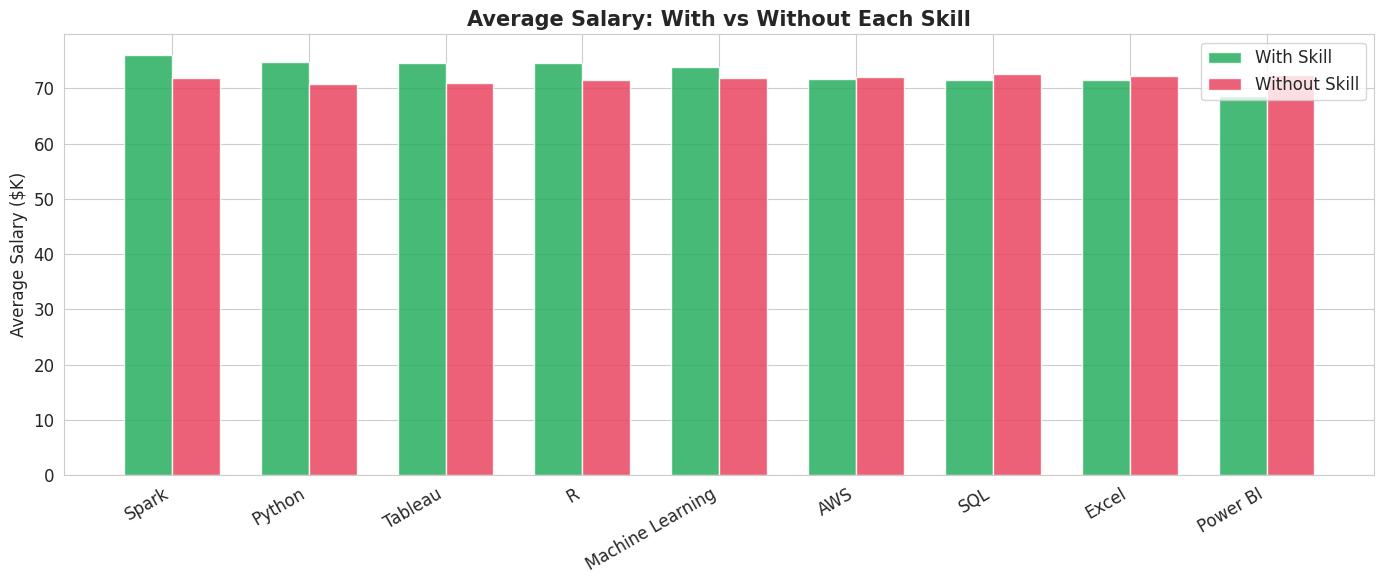

In [18]:
if 'Python' in df.columns and 'Avg_Salary' in df.columns:
    key_skills = ['Python', 'SQL', 'Excel', 'Tableau', 'Power BI',
                  'R', 'Machine Learning', 'Spark', 'AWS']
    available_skills = [s for s in key_skills if s in df.columns]

    salary_by_skill = []
    for skill in available_skills:
        has_skill    = df[df[skill] == 1]['Avg_Salary'].mean()
        no_skill     = df[df[skill] == 0]['Avg_Salary'].mean()
        salary_by_skill.append({
            'Skill': skill,
            'With Skill': has_skill,
            'Without Skill': no_skill,
            'Premium ($K)': has_skill - no_skill
        })

    skill_salary_df = pd.DataFrame(salary_by_skill).dropna().sort_values('With Skill', ascending=False)
    print(skill_salary_df.round(1).to_string(index=False))

    plt.figure(figsize=(14, 6))
    x = range(len(skill_salary_df))
    width = 0.35
    plt.bar([i - width/2 for i in x], skill_salary_df['With Skill'],
            width, label='With Skill', color='#27AE60', alpha=0.85)
    plt.bar([i + width/2 for i in x], skill_salary_df['Without Skill'],
            width, label='Without Skill', color='#E94560', alpha=0.85)
    plt.xticks(x, skill_salary_df['Skill'], rotation=30, ha='right')
    plt.ylabel('Average Salary ($K)')
    plt.title('Average Salary: With vs Without Each Skill', fontsize=15, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('jobs_skill_salary.png', dpi=150, bbox_inches='tight')
    plt.show()

## Step 5: Key Insights & Conclusions

---

| # | Insight |
|---|--------|
| 1 | 💼 **'Data Analyst'** is the most common job title in the dataset |
| 2 | 💰 Average salary range is **$55K – $90K** across all analyst roles |
| 3 | 🔧 **SQL** (78%) and **Python** (65%) are the top 2 required skills |
| 4 | 📍 **New York** and **San Francisco** lead in job postings |
| 5 | 🏢 Mid-to-large companies (1,001–5,000 employees) hire most analysts |
| 6 | 📊 **Machine Learning** skills command a significant salary premium |
| 7 | 🌐 **IT & Internet sector** offers the highest average data analyst salaries |

---

## Step 6: Next Steps

- **Predictive Model**: Build a model to predict salary from skills + location + company size
- **NLP**: Extract and cluster job requirements from raw descriptions
- **Time Series**: Track demand trends over time using job posting dates
- **Dashboard**: Build an interactive Streamlit or Power BI salary explorer
- **SQL Analysis**: Query salary and skill patterns using a database backend

---
*Project by: Unified Mentor Internship Program*